In [8]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec

In [15]:
def model(y, t, pi, alpha, mu, loss, phi, beta, rV, delta, d):

    U, Uc, L, Lc, Lp, Lcp, V, VT = y

    N = U + Uc + L + Lc + Lp + Lcp
    NT = Uc + Lc + Lp + Lcp


    dydt = [U*(1 - d - N + (1-pi)*phi*NT/N) - beta*U*(V + VT) + loss*(L + Lp) + mu*Uc,
            Uc*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) - beta*Uc*(V + VT) + loss*(Lc + Lcp) - mu*Uc,
            L*(1 - d - N + (1-pi)*phi*NT/N) + beta*U*V - (alpha + loss)*L + mu*Lc + mu*Lp,
            Lc*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*Uc*V - (alpha + loss)*Lc - mu*Lc + mu*Lcp ,
            Lp*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*U*VT - (alpha + loss)*Lp - mu*Lp + mu*Lcp ,
            Lcp*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*Uc*VT - (alpha + loss)*Lcp - mu*Lcp - mu*Lcp,
            alpha*rV*(L + Lc) - beta*(U+Uc)*V - delta*V,
            alpha*rV*(Lp + Lcp) - beta*(U+Uc)*VT - delta*VT]

    return dydt

result = []
beta = 0.02        # maximum phage infection rate
loss = 0.002        # Rate of prophage loss 
mu = 0.002          # Rate of loss of gene
rV = 30            # phage burst size
delta = 0.02       # Rate of virion decay 0.001
d = 0.02        # Intrinsic death rate
phi = 1

for pi in np.logspace(-5,0,100):
    alphavals = []
    for alpha in np.logspace(-5,-1,100):
           
        alphaT = alpha
        y0 = [0.495, 0.5, 0.005, 0, 0]

        t = np.linspace(0, 1000000, 100001)
        sol = odeint(model_ncp, y0, t, args=(pi, alpha, mu, loss, phi, beta, rV, delta, d))
        data = pd.DataFrame(sol, columns = ["U", "Uc", "Lp", "Lcp", "VT"])
        data[data<10**-6]=0
        data['phage'] = (data['Lp']+data['Lcp'])/(data['U']+data['Uc']+data['Lp']+data['Lcp'])
        data['gene'] = (data['Uc']+data['Lp']+data['Lcp'])/(data['U']+data['Uc']+data['Lp']+data['Lcp'])
        alphavals.append(data.iloc[-1])
    result.append(alphavals)

In [39]:
ath = loss*(beta+delta)/(beta*(rV-1)-delta)
pth = mu/phi

In [86]:
def get_persistence(result):
    phage = result[:,:,-2].T
    gene = result[:,:,-1].T
    
    pers = np.zeros((100, 100,3))

    j=0
    for pi in np.logspace(-5,0,100):
        i=0
        for alpha in np.linspace(-5,-1,100):
            pers[i][j] = [int(gene[i][j]*250),0,int(phage[i][j]*250)]
            i+=1
        j+=1 
    
    return pers
    

In [479]:
y0 = [0, 0, 0.495, 0.5, 0.005, 0, 0, 0]
beta = 0.02        # maximum phage infection rate
loss = 0.002        # Rate of prophage loss 0.001
mu = 0.002          # Rate of loss of chromosomally encoded gene T 0.0001
rV = 30            # phage burst size
p = 0.0           # fraction of virions carying gene T upon lysis of L*
delta = 0.02       # Rate of virion decay 0.001
d = 0.02
phi = 1

alpha = 0.01
pi = 0.0001
t = np.linspace(0, 1000000, 100001)
sol = odeint(model, y0, t, args=(pi, alpha, mu, loss, phi, beta, rV, delta, d))
ts1 = pd.DataFrame(sol, columns = ["U", "Uc", "L", "Lc", "Lp", "Lcp", "V", "VT"])
ts1[ts1<10**-6]=0

alpha = 10**-4.5
pi = 0.0001
t = np.linspace(0, 1000000, 100001)
sol = odeint(model, y0, t, args=(pi, alpha, mu, loss, phi, beta, rV, delta, d))
ts2 = pd.DataFrame(sol, columns = ["U", "Uc", "L", "Lc", "Lp", "Lcp", "V", "VT"])
ts2[ts2<10**-6]=0

alpha = 10**-4.5
pi = 0.1
t = np.linspace(0, 1000000, 100001)
sol = odeint(model, y0, t, args=(pi, alpha, mu, loss, phi, beta, rV, delta, d))
ts3 = pd.DataFrame(sol, columns = ["U", "Uc", "L", "Lc", "Lp", "Lcp", "V", "VT"])
ts3[ts3<10**-6]=0

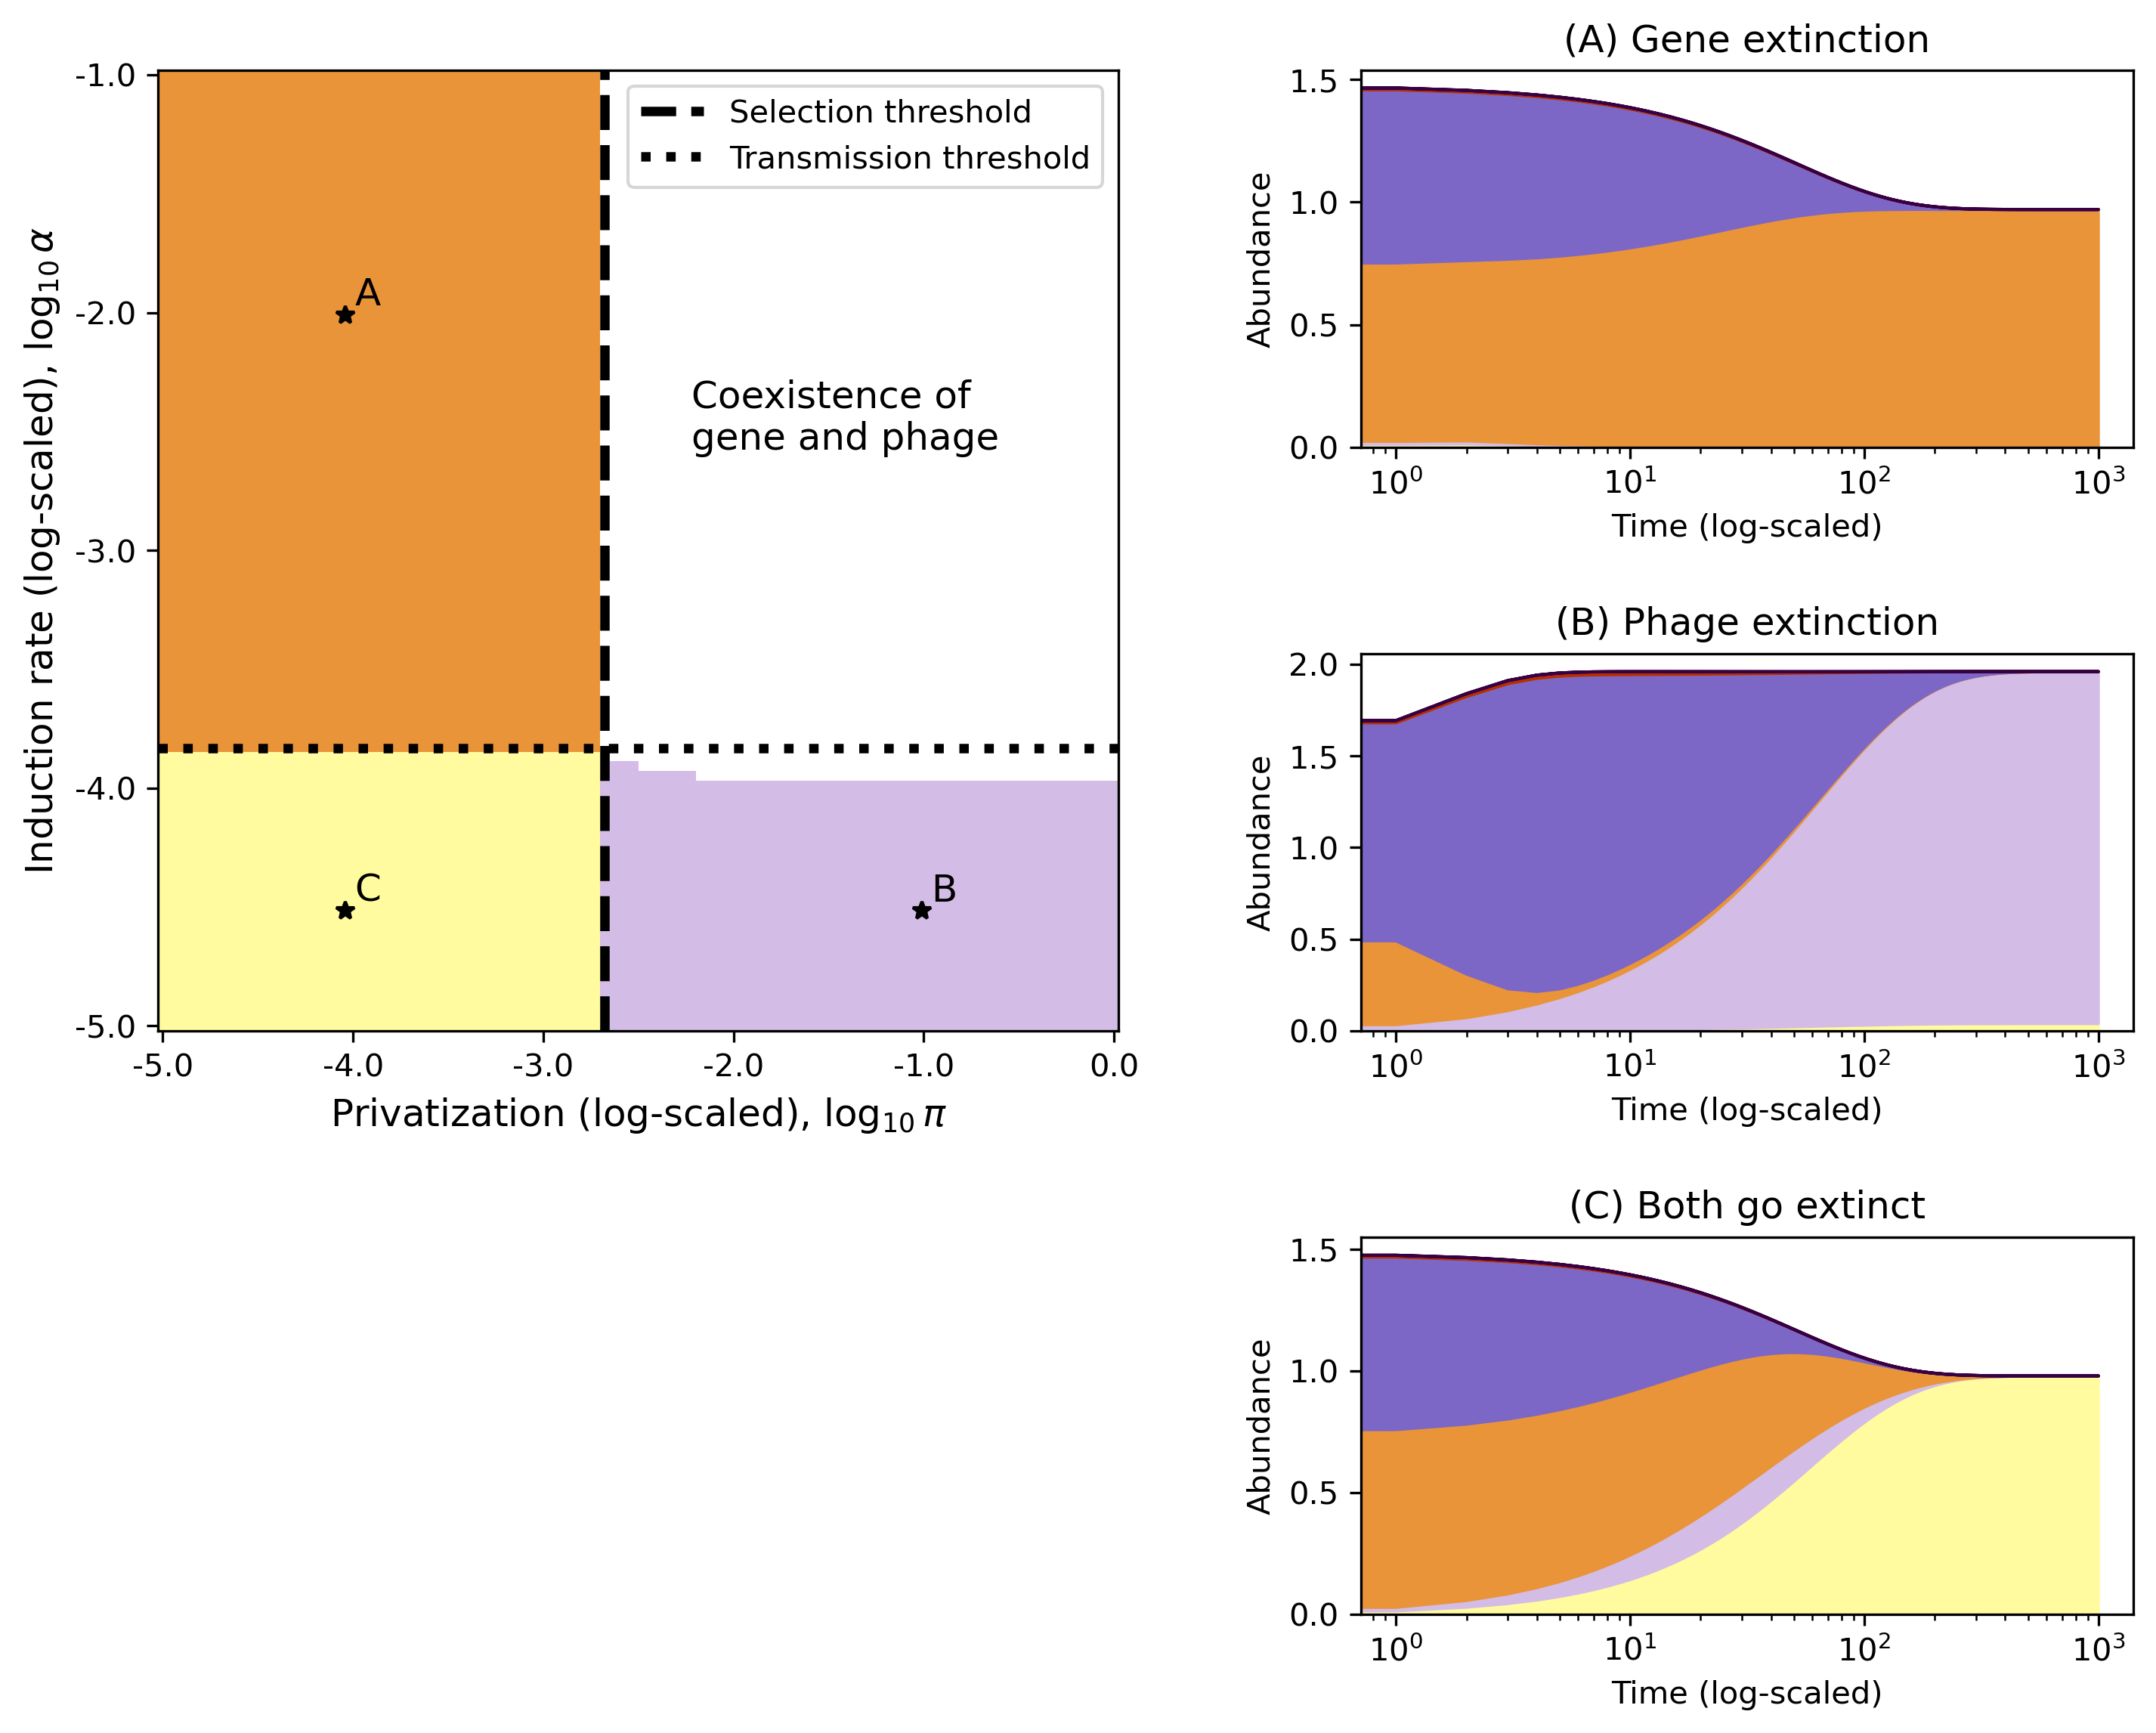

In [569]:
from matplotlib.gridspec import GridSpec
 
# create objects
fig = plt.figure(figsize=(10,8), dpi=300)
gs = GridSpec(6, 7, figure=fig)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0:4, 0:4])
ax2 = fig.add_subplot(gs[0:2, 4:7])
ax3 = fig.add_subplot(gs[2:4, 4:7])
ax4 = fig.add_subplot(gs[4:6, 4:7])

ax1.imshow(np.zeros((100,100)), 'Greys', origin="lower")
ax1.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=12)
ax1.set_yticks(np.linspace(0,99,5), np.linspace(-5,-1,5))
ax1.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=12)
ax1.set_xticks(np.linspace(0,99,6), np.linspace(-5,0,6))
ax1.axvline((np.log10(pth)+5)*20, c='black', linestyle='dashed', label="Selection threshold", linewidth = 3)
ax1.axhline((np.log10(ath)+5)*25, c='black', linestyle='dotted', label="Transmission threshold", linewidth = 3)
ax1.legend(prop={'size': 10})

gene = np.array(result)[:,:,-1].T
gene[gene>0] = np.nan
gene_mask = np.ma.masked_less(gene, 1)

phage = np.array(result)[:,:,-2].T
phage[phage>0] = np.nan
phage_mask = np.ma.masked_less(phage, 1)

ax1.pcolor(np.linspace(0,99,100), np.linspace(0,99,100), gene_mask.data, alpha=1, linewidth=0, cmap=ListedColormap(['#e99438']), edgecolor='none', label="Gene extinct")
ax1.pcolor(np.linspace(0,99,100), np.linspace(0,99,100), phage_mask.data, alpha=1, linewidth=0, cmap=ListedColormap(['#d3bce6']), edgecolor='none', label="Phage extinct")
ax1.pcolor(np.linspace(0,99,100), np.linspace(0,99,100), gene_mask.data+phage_mask.data, alpha=1, linewidth=0, cmap=ListedColormap(['#fffb9e']), edgecolor='none', label="")

ax1.text(20,75,'A',  fontsize=12)
ax1.plot([19],[74],'*',color='k')
ax1.text(80,13,'B',  fontsize=12)
ax1.plot([79],[12],'*',color='k')
ax1.text(20,13,'C',  fontsize=12)
ax1.plot([19],[12],'*',color='k')
ax1.text(55,60,'Coexistence of \ngene and phage',  fontsize=12)

plt.rcParams.update({'lines.linewidth':0})
ts1.iloc[0:1000, :].plot.area(y=["U", "Uc", "L", "Lc", "Lp", "Lcp"], color=('#FFFB9E','#D3BCE6','#E99438','#7D67C6', '#B72E00', '#370044'), ax=ax2)
ax2.set_xscale('log')
ax2.set_xlabel("Time (log-scaled)")
ax2.set_ylabel("Abundance")
ax2.legend().remove()
ax2.set_title("(A) Gene extinction")

plt.rcParams.update({'lines.linewidth':0})
ts2.iloc[0:1000, :].plot.area(y=["U", "Uc", "L", "Lc", "Lp", "Lcp"], color=('#FFFB9E','#D3BCE6','#E99438','#7D67C6', '#B72E00', '#370044'), ax=ax4)
ax4.set_xscale('log')
ax4.set_xlabel("Time (log-scaled)")
ax4.set_ylabel("Abundance")
ax4.legend().remove()
ax3.set_title("(B) Phage extinction")

plt.rcParams.update({'lines.linewidth':0})
ts3.iloc[0:1000, :].plot.area(y=["U", "Uc", "L", "Lc", "Lp", "Lcp"], color=('#FFFB9E','#D3BCE6','#E99438','#7D67C6', '#B72E00', '#370044'), ax=ax3)
ax3.set_xscale('log')
ax3.set_xlabel("Time (log-scaled)")
ax3.set_ylabel("Abundance")
ax3.legend().remove()
ax4.set_title("(C) Both go extinct")

plt.rcParams.update({'lines.linewidth':1})

fig.tight_layout(pad=2.0)

plt.savefig("fig1_persistence.png")

In [16]:
result_inC_phi = [[[],[]],[[],[]]]
beta = 0.02        # maximum phage infection rate
loss = 0.002        # Rate of prophage loss 0.001
mu = 0.002          # Rate of loss of chromosomally encoded gene T 0.0001
rV = 30            # phage burst size
delta = 0.02       # Rate of virion decay 0.001
d = 0.02

pi = 1


i = 0
for initC in [0.005, 0.5]:
    j= 0 
    for initP in [0.005, 0.5]:
        for phi in np.logspace(-5,0,100):
            alphavals = []
            for alpha in np.logspace(-5,-1,100):
           
                alphaT = alpha
                y0 = [0, 0, 1-initC-initP, initC, initP, 0, 0, 0]

                t = np.linspace(0, 1000000, 10001)
                sol = odeint(model, y0, t, args=(pi, alpha, mu, loss, phi, beta, rV, delta, d))
                data = pd.DataFrame(sol, columns = ["U", "Uc", "L", "Lc", "Lp", "Lcp", "V", "VT"])
                data[data<10**-6]=0
                data['phageG'] = (data['Lp']+data['Lcp'])/(data['L']+data['Lc']+data['Lp']+data['Lcp'])
                data['geneP'] = (data['Lp']+data['Lcp'])/(data['Uc']+data['Lc']+data['Lp']+2*data['Lcp'])
                alphavals.append(data.iloc[-1])
            result_inC_phi[i][j].append(alphavals)
        j+=1
    i+=1

In [ ]:
cm = np.zeros((100, 100,3))
j=0
for pi in np.logspace(-5,0,100):
    i=0
    for alpha in np.linspace(-5,-1,100):
        cm[i][j] = [250-int(i*2.5),250-int(j*2.5),250-int(j*2.5)]
        i+=1
    j+=1

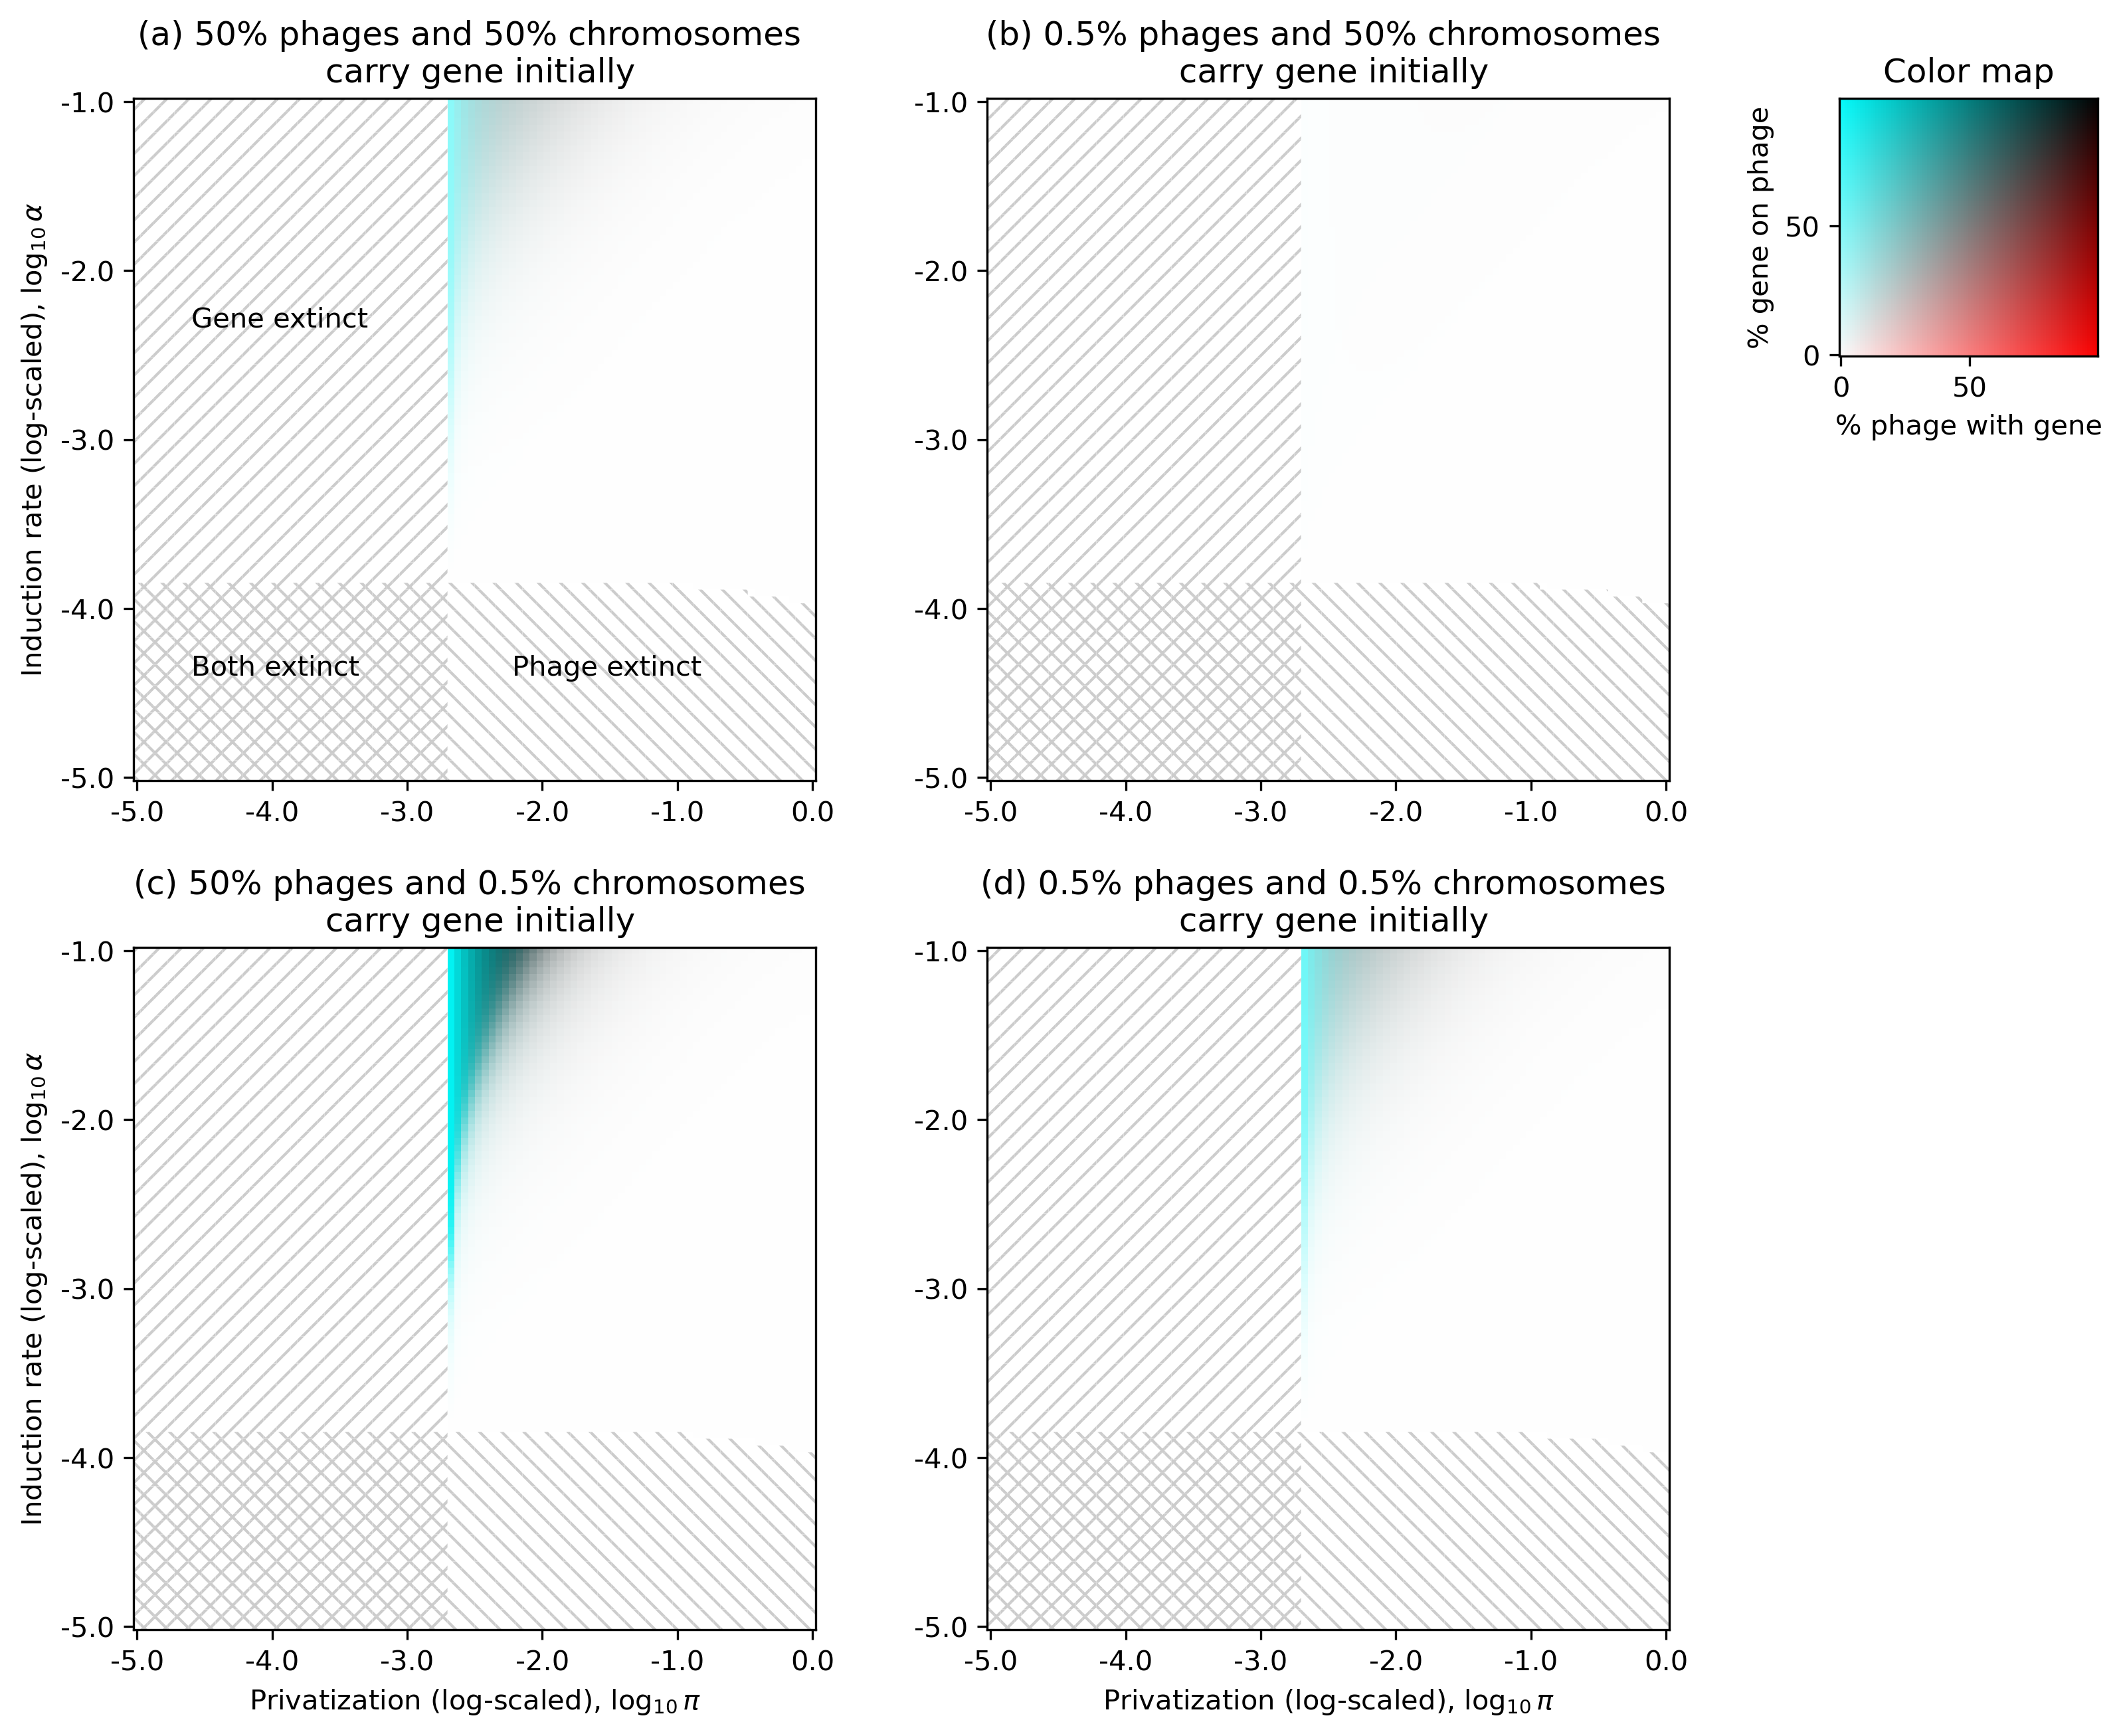

In [17]:
def get_RGB(result):
    phage = result[:,:,-2].T
    gene = result[:,:,-1].T
    
    pers = np.zeros((100, 100,3))

    j=0
    for pi in np.logspace(-5,0,100):
        i=0
        for alpha in np.linspace(-5,-1,100):
            if (np.isnan(gene[i][j]) or np.isnan(phage[i][j])):
                pers[i][j] = [1,1,1]
            else:
                pers[i][j] = [1-gene[i][j],1 - phage[i][j],1-phage[i][j]]
            i+=1
        j+=1 
    
    return pers

fig = plt.figure(figsize=(11,9), dpi=300)
gs = GridSpec(8, 10, figure=fig)

ax1 = fig.add_subplot(gs[0:4, 0:4])
ax2 = fig.add_subplot(gs[0:4, 4:8])
ax3 = fig.add_subplot(gs[4:8, 0:4])
ax4 = fig.add_subplot(gs[4:8, 4:8])
ax5 = fig.add_subplot(gs[0:2,8:10])

axes=[ax1,ax2,ax3,ax4]

k=0
i = 0
for initU in [0.001, 0.099]:
    j= 0 
    for initV in [0.01, 0.99]:
        
        dat = get_RGB(np.array(result_inC_phi[j][i]))
        axes[k].imshow(dat, origin="lower")
        axes[k].set_xticks(np.linspace(0,99,6), np.linspace(-5,0,6))
        axes[k].set_yticks(np.linspace(0,99,5), np.linspace(-5,-1,5))
        
        gene = np.array(result_inC_phi[j][i])[:,:,-1].T
        gene = np.nan_to_num(gene, nan=-1)
        gene[gene>=0] = np.nan
        gene_mask = np.ma.masked_less(gene, 1)

        phage = np.array(result_inC_phi[j][i])[:,:,-2].T
        phage = np.nan_to_num(phage, nan=-1)
        phage[phage>=0] = np.nan
        phage_mask = np.ma.masked_less(phage, 1)
        
        axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), gene_mask.data, hatch='///', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="Gene extinct")
        axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), phage_mask.data, hatch='\\\\\\', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="Phage extinct")
        axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), gene_mask.data+phage_mask.data, hatch='xxx', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="")
        
        j+=1
        k+=1
    i+=1

ax1.text(8,66,"Gene extinct")
ax1.text(55,15,"Phage extinct")
ax1.text(8,15,"Both extinct")
        
ax5.set_title("Color map")
ax5.imshow(cm.astype(np.uint8), origin="lower")
ax5.set_xticks([0,50])
ax5.set_yticks([0,50])
ax5.set_xlabel("% phage with gene")
ax5.set_ylabel("% gene on phage")

ax1.set_title("(a) 50% phages and 50% chromosomes \n carry gene initially", fontsize=12)
ax2.set_title("(b) 0.5% phages and 50% chromosomes \n carry gene initially", fontsize=12)
ax3.set_title("(c) 50% phages and 0.5% chromosomes \n carry gene initially", fontsize=12)
ax4.set_title("(d) 0.5% phages and 0.5% chromosomes \n carry gene initially", fontsize=12)

ax1.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=10)
ax3.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=10)
ax3.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=10)
ax4.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=10)

fig.tight_layout(pad=2.0)

plt.savefig("fig2_priority_t10_6_phi.png")

In [48]:
def model1(y, t, pi, alpha, mu, loss, phi, beta, rV, delta, d):

    U, Uc, L, Lc, Lp, Lcp, V, VT = y

    N = U + Uc + L + Lc + Lp + Lcp
    NT = Uc + Lc + Lp + Lcp


    dydt = [U*(1 - d - N + (1-pi)*phi*NT/N) - beta*U*(V + VT) + loss*(L + Lp) + mu*Uc,
            Uc*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) - beta*Uc*(V + VT) + loss*(Lc + Lcp) - mu*Uc,
            L*(1 - d - N + (1-pi)*phi*NT/N) + beta*U*V - loss*L + mu*Lc + mu*Lp,
            Lc*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*Uc*V - (alpha + loss)*Lc - mu*Lc + mu*Lcp ,
            Lp*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*U*VT - (alpha + loss)*Lp - mu*Lp + mu*Lcp ,
            Lcp*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*Uc*VT - (alpha + loss)*Lcp - mu*Lcp - mu*Lcp,
            alpha*rV*Lc - beta*(U+Uc)*V - delta*V,
            alpha*rV*(Lp + Lcp) - beta*(U+Uc)*VT - delta*VT]

    return dydt

result_case1 = []
beta = 0.02        # maximum phage infection rate
loss = 0.002        # Rate of prophage loss 0.001
mu = 0.002          # Rate of loss of gene
rV = 30            # phage burst size
delta = 0.02       # Rate of virion decay 0.001
d = 0.02

phi = 1

for pi in np.logspace(-5,0,100):
    alphavals = []
    for alpha in np.logspace(-5,-1,100):
        y0 = [0, 0, 0.495, 0.5, 0.005, 0, 0, 0]

        t = np.linspace(0, 100000000, 1000001)
        sol = odeint(model1, y0, t, args=(pi, alpha, mu, loss, phi, beta, rV, delta, d))
        data = pd.DataFrame(sol, columns = ["U", "Uc", "L", "Lc", "Lp", "Lcp", "V", "VT"])
        data[data<10**-6]=0
        data['phageG'] = (data['Lp']+data['Lcp'])/(data['L']+data['Lc']+data['Lp']+data['Lcp'])
        data['geneP'] = (data['Lp']+data['Lcp'])/(data['Uc']+data['Lc']+data['Lp']+2*data['Lcp'])
        alphavals.append(data.iloc[-1])
    result_case1.append(alphavals)

In [50]:
def model2(y, t, pi, alpha, mu, loss, p, phi, beta, rV, delta, d, im):

    U, Uc, L, Lc, Lp, Lcp, V, VT = y

    N = U + Uc + L + Lc + Lp + Lcp
    NT = Lc + Lp + Lcp


    dydt = [U*(1 - d - N + (1-pi)*phi*NT/N) - beta*U*(V + VT) + loss*(L + Lp) + mu*Uc,
            Uc*(1 - d - N + (1-pi)*phi*NT/N) - beta*Uc*(V + VT) + loss*(Lc + Lcp) - mu*Uc,
            L*(1 - d - N + (1-pi)*phi*NT/N) + beta*U*V - (alpha + loss)*L + mu*Lc + mu*Lp,
            Lc*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*Uc*V - (alpha + loss)*Lc - mu*Lc + mu*Lcp ,
            Lp*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*U*VT - (alpha + loss)*Lp - mu*Lp + mu*Lcp ,
            Lcp*(1 - d - N + pi*phi + (1-pi)*phi*NT/N) + beta*Uc*VT - (alpha + loss)*Lcp - mu*Lcp - mu*Lcp,
            alpha*rV*(L + Lc) - beta*(U+Uc)*V - delta*V,
            alpha*rV*(Lp + Lcp) - beta*(U+Uc)*VT - delta*VT]

    return dydt

result_case2 = []
beta = 0.02        # maximum phage infection rate
loss = 0.002        # Rate of prophage loss 0.001
mu = 0.002          # Rate of loss of chromosomally encoded gene T 0.0001
rV = 30            # phage burst size
delta = 0.02       # Rate of virion decay 0.001
d = 0.02

phi = 1

for pi in np.logspace(-5,0,100):
    alphavals = []
    for alpha in np.logspace(-5,-1,100):
           
        y0 = [0, 0, 0.495, 0.5, 0.005, 0, 0, 0]

        t = np.linspace(0, 100000000, 1000001)
        sol = odeint(model2, y0, t, args=(pi, alpha, mu, loss, phi, beta, rV, delta, d))
        data = pd.DataFrame(sol, columns = ["U", "Uc", "L", "Lc", "Lp", "Lcp", "V", "VT"])
        data[data<10**-6]=0
        data['phageG'] = (data['Lp']+data['Lcp'])/(data['L']+data['Lc']+data['Lp']+data['Lcp'])
        data['geneP'] = (data['Lp']+data['Lcp'])/(data['Uc']+data['Lc']+data['Lp']+2*data['Lcp'])
        alphavals.append(data.iloc[-1])
    result_case2.append(alphavals)

In [45]:
def model2comp(y, t, pi, alpha, mu, loss, phi, beta, rV, delta, d, im, K):

    U, Uc, L, Lc, Lp, Lcp, V, VT, Ue, Uce, Le, Lce, Lpe, Lcpe, Ve, VTe = y

    N = U + Uc + L + Lc + Lp + Lcp
    NT = Uc + Lc + Lp + Lcp
    Ne = Ue + Uce + Le + Lce + Lpe + Lcpe
    NTe = Uce + Lce + Lpe + Lcpe


    dydt = [U*(1 - d - im - N + (1-pi)*phi*NT/N) - beta*U*(V + VT) + loss*(L + Lp) + mu*Uc + im*Ue,
            Uc*(1 - d - im - N + pi*phi + (1-pi)*phi*NT/N) - beta*Uc*(V + VT) + loss*(Lc + Lcp) - mu*Uc + im*Uce,
            L*(1 - d - im - N + (1-pi)*phi*NT/N) + beta*U*V - (alpha + loss)*L + mu*Lc + mu*Lp + im*Le,
            Lc*(1 - d - im - N + pi*phi + (1-pi)*phi*NT/N) + beta*Uc*V - (alpha + loss)*Lc - mu*Lc + mu*Lcp + im*Lce,
            Lp*(1 - d - im - N + pi*phi + (1-pi)*phi*NT/N) + beta*U*VT - (alpha + loss)*Lp - mu*Lp + mu*Lcp + im*Lpe,
            Lcp*(1 - d - im - N + pi*phi + (1-pi)*phi*NT/N) + beta*Uc*VT - (alpha + loss)*Lcp - mu*Lcp - mu*Lcp + im*Lcpe,
            rV*(alpha*L + alphaT*(1-p)*Lc) - beta*(U+Uc)*V - delta*V - im*(V-Ve),
            alphaT*rV*(p*Lc + Lp + Lcp) - beta*(U+Uc)*VT - delta*VT - im*(VT-VTe),
            Ue*(1 + K - d - im - Ne) - beta*Ue*(Ve + VTe) + loss*(Le + Lpe) + mu*Uce + im*U,
            Uce*(1 + K - d - im - Ne) - beta*Uce*(Ve + VTe) + loss*(Lce + Lcpe) - mu*Uce + im*Uc,
            Le*(1 + K - d - im - Ne) + beta*Ue*Ve - loss*Le + mu*Lce + mu*Lpe + im*L,
            Lce*(1 + K - d - im - Ne) + beta*Uce*Ve - loss*Lce - mu*Lce + mu*Lcpe + im*Lc,
            Lpe*(1 + K - d - im - Ne) + beta*Ue*VTe - loss*Lpe - mu*Lpe + mu*Lcpe + im*Lp ,
            Lcpe*(1 + K - d - im - Ne) + beta*Uce*VTe - loss*Lcpe - mu*Lcpe - mu*Lcpe + im*Lcp,
            - beta*(Ue+Uce)*Ve - delta*Ve + im*(V-Ve),
            - beta*(Ue+Uce)*VTe - delta*VTe + im*(VT-VTe)]

    return dydt

result_2comp = []
beta = 0.02        # maximum phage infection rate
loss = 0.002        # Rate of prophage loss
mu = 0.002          # Rate of loss of gene
rV = 30            # phage burst size
delta = 0.02       # Rate of virion decay
d = 0.02
im = 0.02
K = 1

phi = 1

for pi in np.logspace(-5,0,100):
    alphavals = []
    for alpha in np.logspace(-5,-1,100):
           
        y0 = [0, 0, 0.495, 0.5, 0.005, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]

        t = np.linspace(0, 100000000, 1000001)
        sol = odeint(model2comp, y0, t, args=(pi, alpha, mu, loss, phi, beta, rV, delta, d, im, K))
        data = pd.DataFrame(sol, columns = ["U", "Uc", "L", "Lc", "Lp", "Lcp", "V", "VT","Ue", "Uce", "Le", "Lce", "Lpe", "Lcpe", "Ve", "VTe"])
        data[data<10**-6]=0
        data['phageG'] = (data['Lp']+data['Lcp'])/(data['L']+data['Lc']+data['Lp']+data['Lcp'])
        data['geneP'] = (data['Lp']+data['Lcp'])/(data['Uc']+data['Lc']+data['Lp']+2*data['Lcp'])
        alphavals.append(data.iloc[-1])
    result_2comp.append(alphavals)

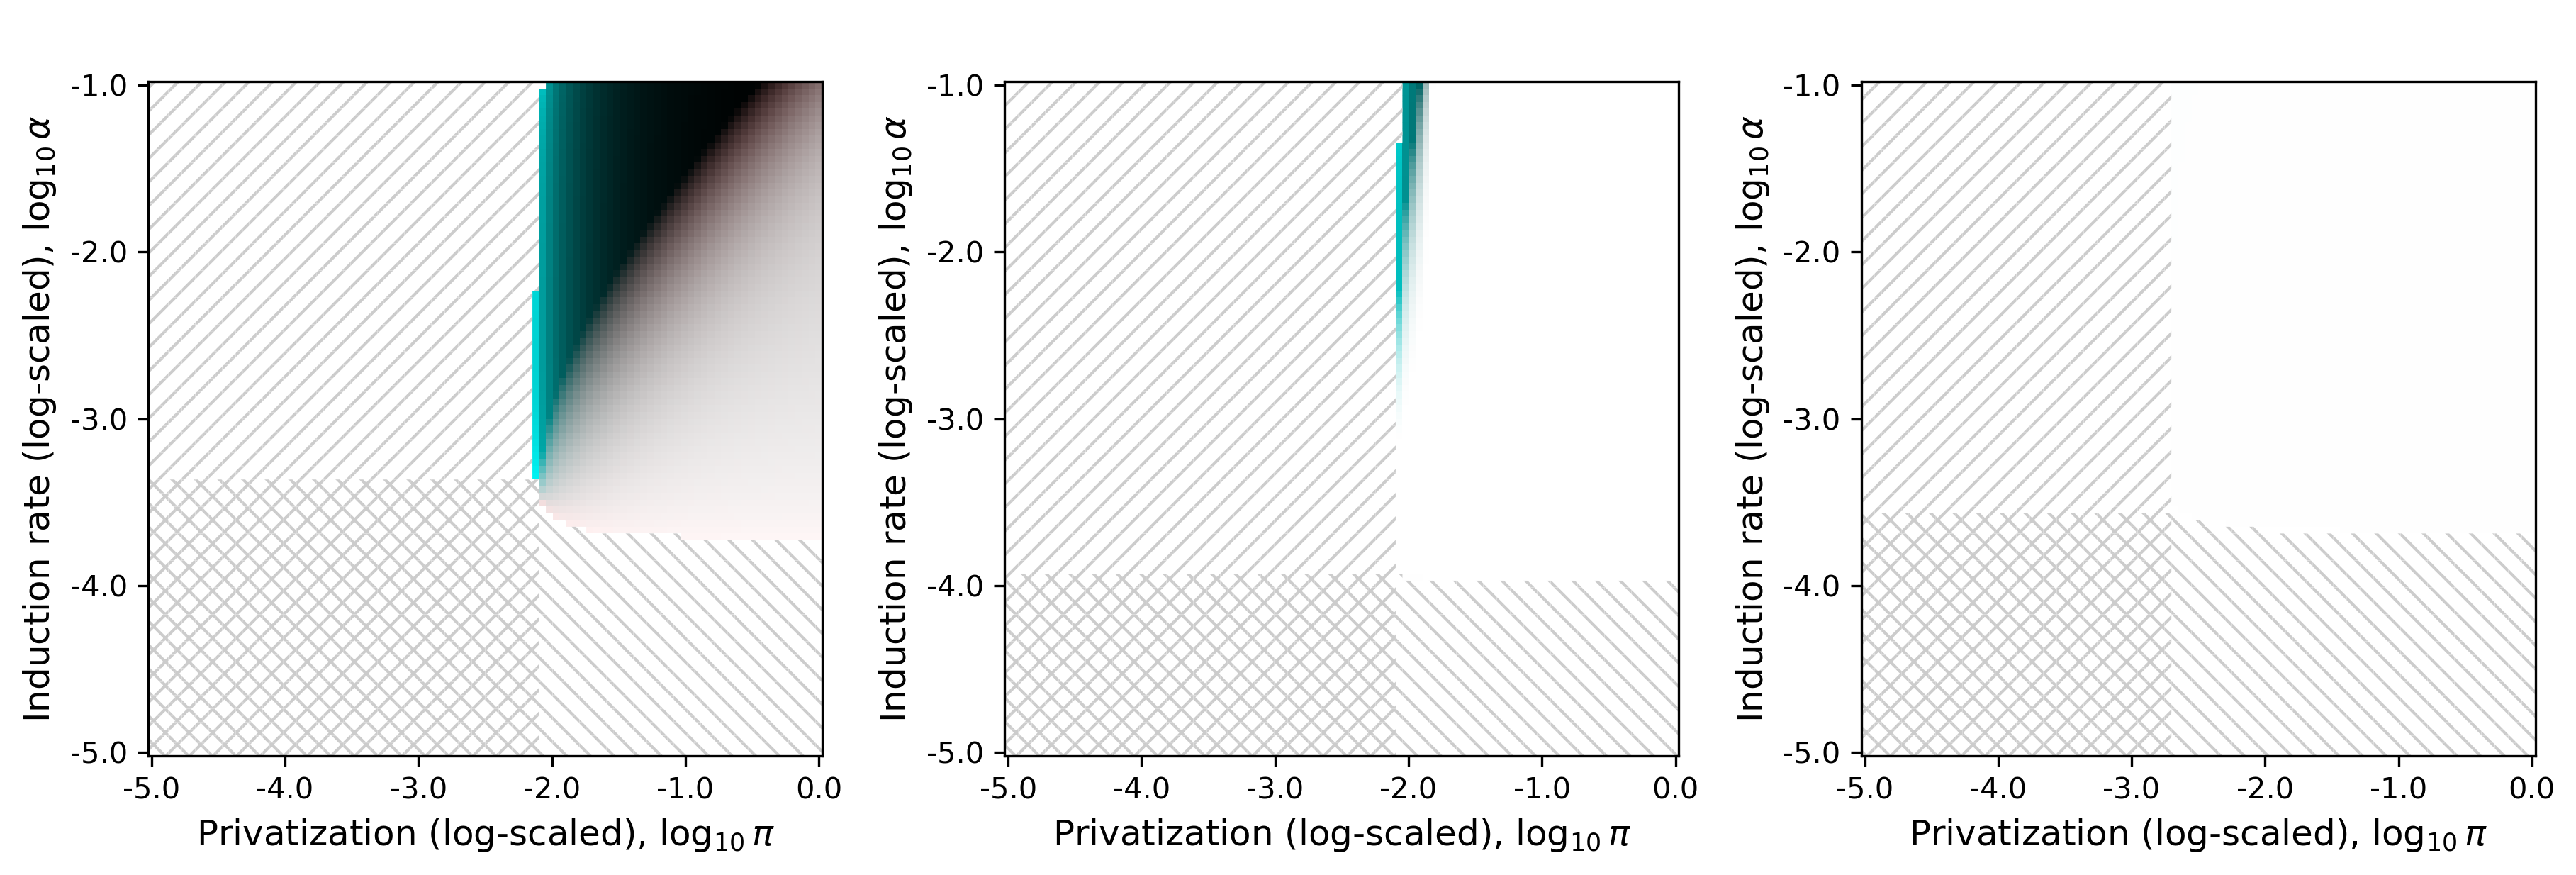

In [55]:
def get_RGB(result):
    phage = result[:,:,-2].T
    gene = result[:,:,-1].T
    
    pers = np.zeros((100, 100,3))

    j=0
    for pi in np.logspace(-5,0,100):
        i=0
        for alpha in np.linspace(-5,-1,100):
            if (np.isnan(gene[i][j]) or np.isnan(phage[i][j])):
                pers[i][j] = [1,1,1]
            else:
                pers[i][j] = [1-gene[i][j],1 -phage[i][j], 1-phage[i][j]]
            i+=1
        j+=1 
    
    return pers

result_cases = [result_2comp, result_2comp_with_induction, result_2comp_with_geneexpn]

fig = plt.figure(constrained_layout=True, figsize=(12,4), dpi=300)
gs = GridSpec(2,6, figure=fig)

ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[0:2, 2:4])
ax3 = fig.add_subplot(gs[0:2, 4:6])

axes=[ax1,ax2,ax3]

for k in range(3):
    dat = get_RGB(np.array(result_cases[k]))
    axes[k].imshow(dat, origin="lower")
    axes[k].set_xticks(np.linspace(0,99,6), np.linspace(-5,0,6))
    axes[k].set_yticks(np.linspace(0,99,5), np.linspace(-5,-1,5))
        
    gene = np.array(result_cases[k])[:,:,-1].T
    gene = np.nan_to_num(gene, nan=-1)
    gene[gene>=0] = np.nan
    gene_mask = np.ma.masked_less(gene, 1)

    phage = np.array(result_cases[k])[:,:,-2].T
    phage = np.nan_to_num(phage, nan=-1)
    phage[phage>=0] = np.nan
    phage_mask = np.ma.masked_less(phage, 1)
        
    axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), gene_mask.data, hatch='///', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="Gene extinct")
    axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), phage_mask.data, hatch='\\\\\\', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="Phage extinct")
    axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), gene_mask.data+phage_mask.data, hatch='xxx', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="")

ax2.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=12)
ax2.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=12)
ax3.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=12)
ax3.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=12)
ax4.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=12)
ax4.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=12)

plt.savefig("fig_cases_2comp.png")

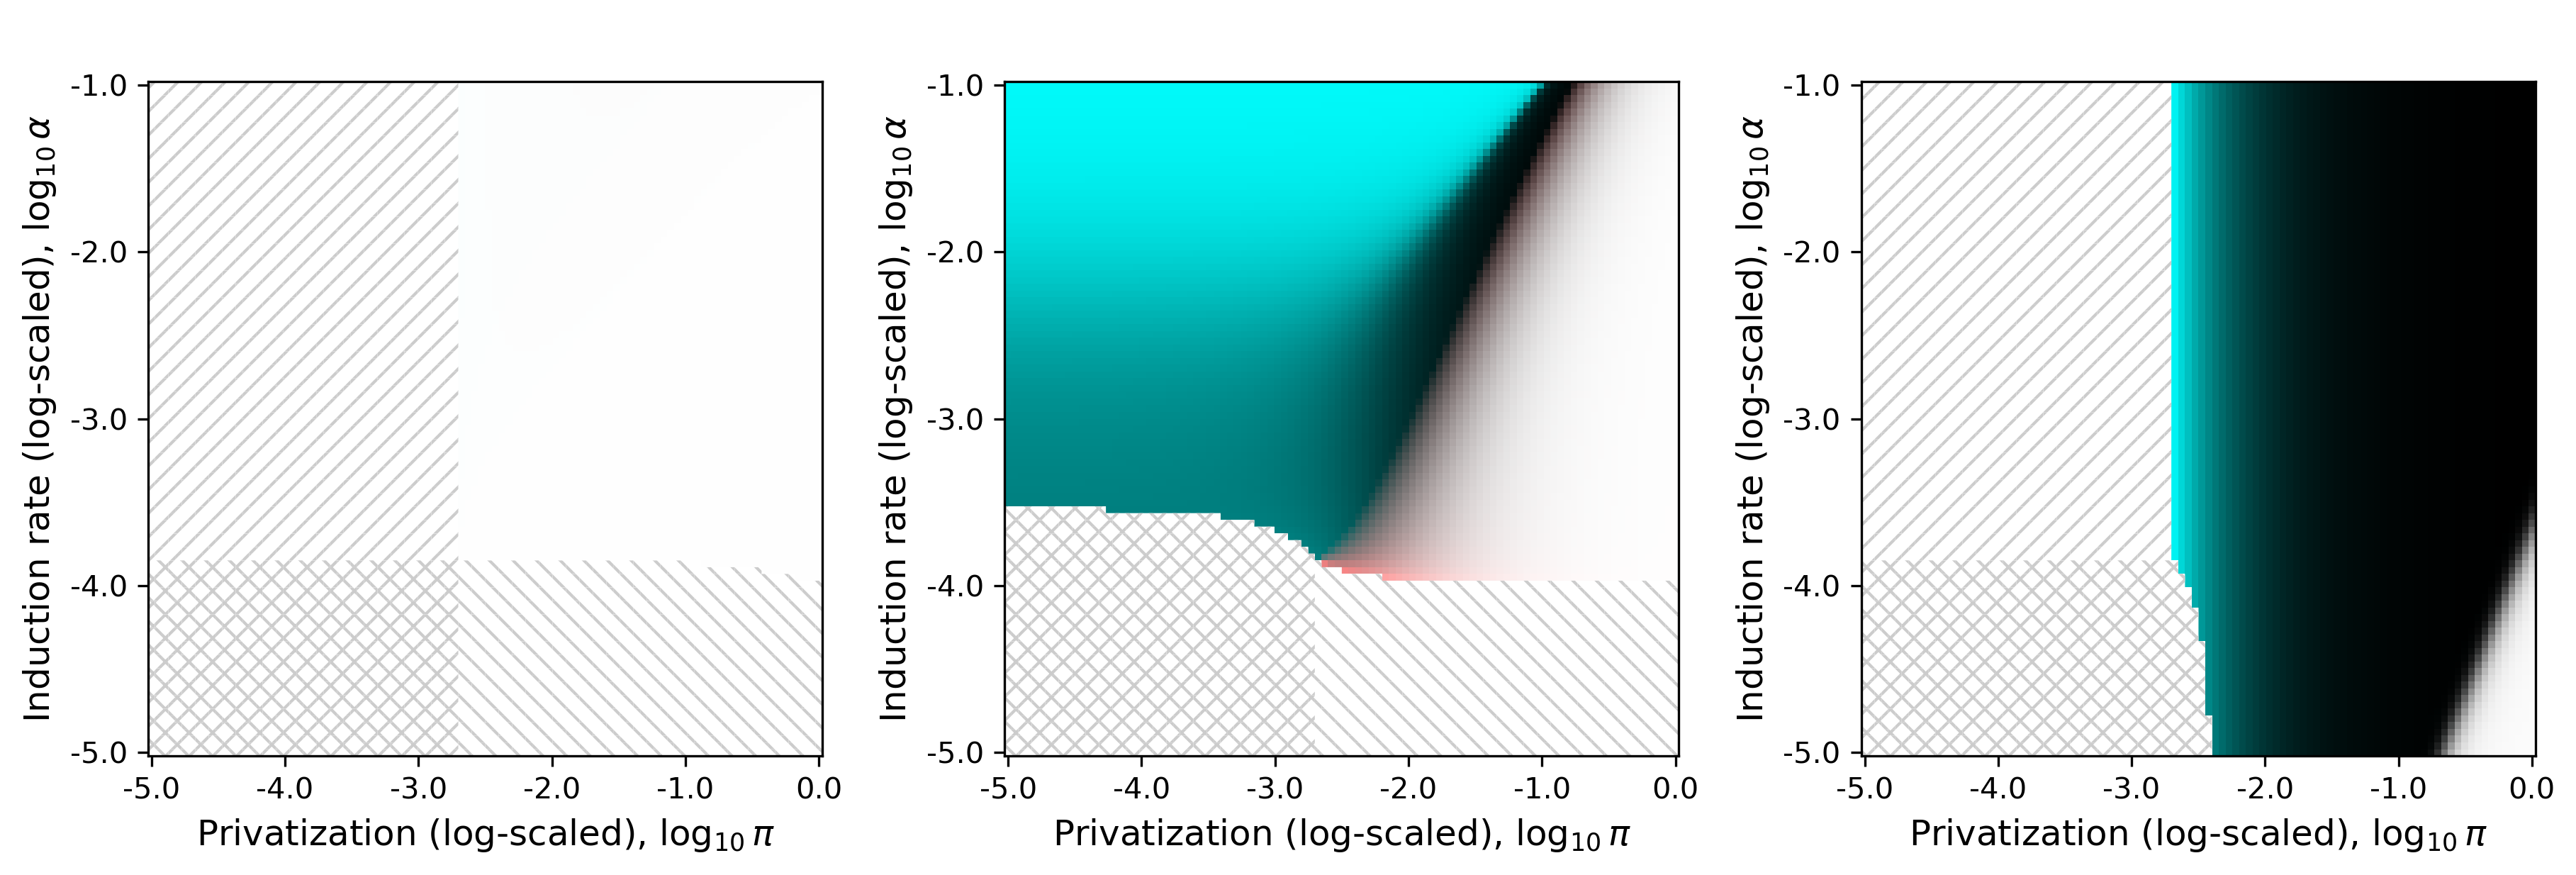

In [54]:
def get_RGB(result):
    phage = result[:,:,-2].T
    gene = result[:,:,-1].T
    
    pers = np.zeros((100, 100,3))

    j=0
    for pi in np.logspace(-5,0,100):
        i=0
        for alpha in np.linspace(-5,-1,100):
            if (np.isnan(gene[i][j]) or np.isnan(phage[i][j])):
                pers[i][j] = [1,1,1]
            else:
                pers[i][j] = [1-gene[i][j],1 -phage[i][j], 1-phage[i][j]]
            i+=1
        j+=1 
    
    return pers

result_cases = [result_inC_phi[1][0], result_case1, result_case2]

fig = plt.figure(constrained_layout=True, figsize=(12,4), dpi=300)
gs = GridSpec(2,6, figure=fig)

ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[0:2, 2:4])
ax3 = fig.add_subplot(gs[0:2, 4:6])

axes=[ax1,ax2,ax3]

for k in range(3):
    dat = get_RGB(np.array(result_cases[k]))
    axes[k].imshow(dat, origin="lower")
    axes[k].set_xticks(np.linspace(0,99,6), np.linspace(-5,0,6))
    axes[k].set_yticks(np.linspace(0,99,5), np.linspace(-5,-1,5))
        
    gene = np.array(result_cases[k])[:,:,-1].T
    gene = np.nan_to_num(gene, nan=-1)
    gene[gene>=0] = np.nan
    gene_mask = np.ma.masked_less(gene, 1)

    phage = np.array(result_cases[k])[:,:,-2].T
    phage = np.nan_to_num(phage, nan=-1)
    phage[phage>=0] = np.nan
    phage_mask = np.ma.masked_less(phage, 1)
        
    axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), gene_mask.data, hatch='///', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="Gene extinct")
    axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), phage_mask.data, hatch='\\\\\\', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="Phage extinct")
    axes[k].pcolor(np.linspace(0,99,100), np.linspace(0,99,100), gene_mask.data+phage_mask.data, hatch='xxx', alpha=1, linewidth=0, cmap=ListedColormap(['white']), edgecolor='#CCCCCC', label="")

ax1.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=12)
ax1.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=12)
ax2.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=12)
ax2.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=12)
ax3.set_xlabel(r"Privatization (log-scaled), $\log_{10}\pi$",  fontsize=12)
ax3.set_ylabel(r"Induction rate (log-scaled), $\log_{10}\alpha$", fontsize=12)

plt.savefig("fig_coreg.png")